In [1]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [2]:
adata = sc.read_visium('/diskmnt/Datasets/Spatial_Transcriptomics/outputs_OCT/Human/HT112C1/H1/HT112C1-U2_ST_Bn1/outs')

In [3]:
adata.var_names_make_unique()
adata.raw = adata
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [4]:
adata_dis500 = adata.copy()
adata_dis500

AnnData object with n_obs × n_vars = 1727 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

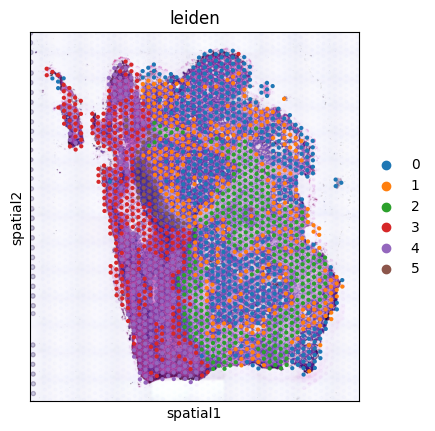

In [5]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)
sc.pl.spatial(adata, color='leiden')

In [6]:
df_cellchat = ct.pp.ligand_receptor_database(species='human', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1199, 4)


In [7]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(270, 4)


In [8]:
adata_dis500

AnnData object with n_obs × n_vars = 1727 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [9]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)

In [10]:
adata_dis500

AnnData object with n_obs × n_vars = 1727 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'commot-cellchat-info'
    obsm: 'spatial', 'commot-cellchat-sum-sender', 'commot-cellchat-sum-receiver'
    obsp: 'commot-cellchat-SHH-PTCH2_SMO', 'commot-cellchat-SHH-PTCH1_SMO', 'commot-cellchat-PLG-F2RL1', 'commot-cellchat-PLG-PARD3', 'commot-cellchat-PLG-F2R', 'commot-cellchat-LTA_LTB-LTBR', 'commot-cellchat-IL16-CD4', 'commot-cellchat-CCL15-CCR1', 'commot-cellchat-IL6-IL6R_IL6ST', 'commot-cellchat-BMP8A-ACVR1_BMPR2', 'commot-cellchat-BMP8A-BMPR1A_ACVR2B', 'commot-cellchat-BMP8A-ACVR1_ACVR2A', 'commot-cellchat-BMP8A-BMPR1A_ACVR2A', 'commot-cellchat-BMP8A-BMPR1A_BMPR2', 'commot-cellchat-BMP8A-ACVR1_ACVR2B', 'commot-cellchat-IL15-IL15RA_IL2RB_IL2RG', 'commot-cellchat-SEMA3B-NRP2_PLXNA1', 'commot-cellchat-SEMA3B-NRP1_PLXNA2', 'commot-cellchat-SEMA3B-NRP2_PLXNA2', 'commot-cellchat-SEMA3B-NRP1_PLXNA1', 'commot-cellc

Text(0.5, 1.0, 'Receiver')

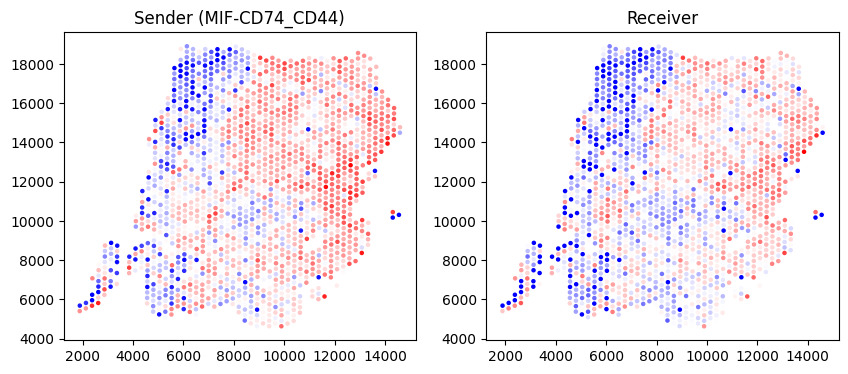

In [11]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MIF-CD74_CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MIF-CD74_CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

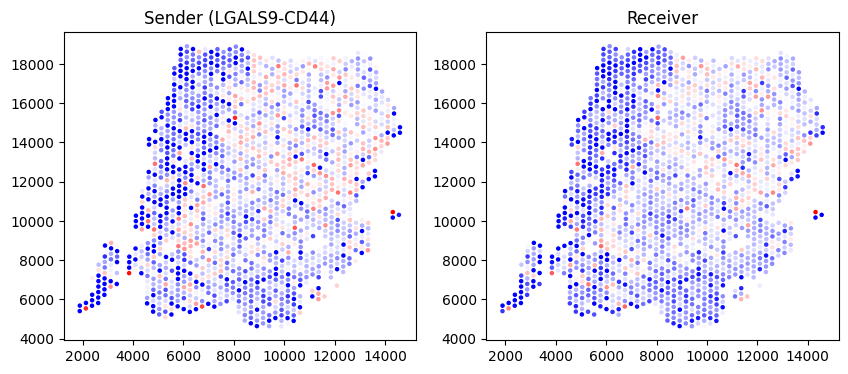

In [12]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-LGALS9-CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-LGALS9-CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (LGALS9-CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

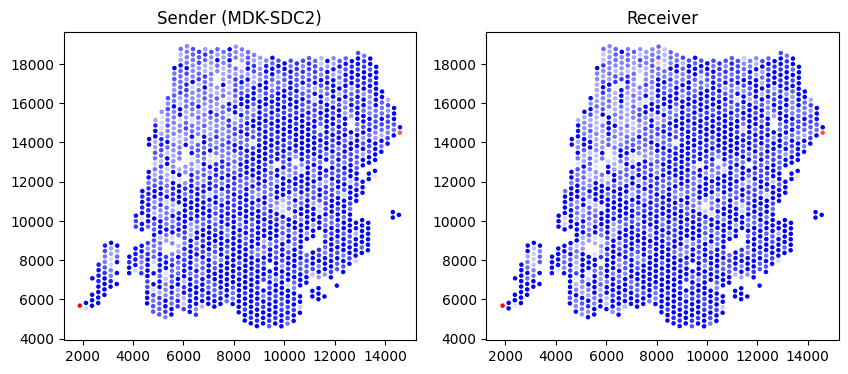

In [13]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MDK-SDC2']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MDK-SDC2']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MDK-SDC2)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

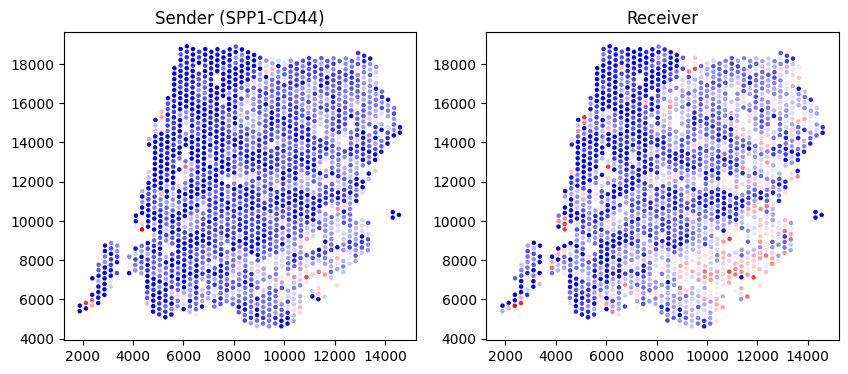

In [14]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-SPP1-CD44']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-SPP1-CD44']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (SPP1-CD44)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

Text(0.5, 1.0, 'Receiver')

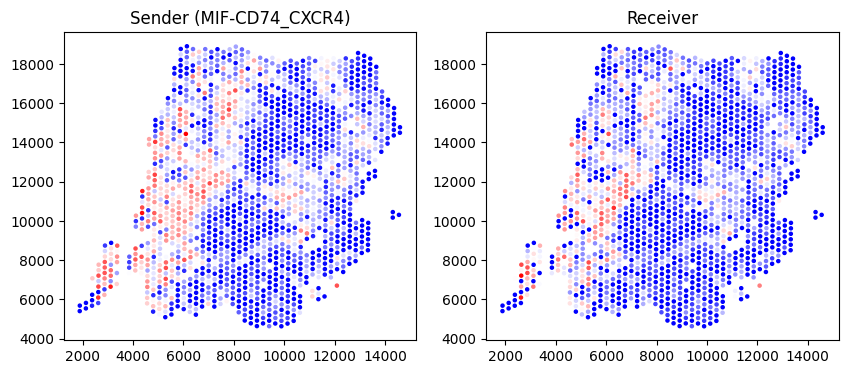

In [15]:
pts = adata_dis500.obsm['spatial']
s = adata_dis500.obsm['commot-cellchat-sum-sender']['s-MIF-CD74_CXCR4']
r = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CXCR4']
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(pts[:,0], pts[:,1], c=s, s=5, cmap='bwr')
ax[0].set_title('Sender (MIF-CD74_CXCR4)')
ax[1].scatter(pts[:,0], pts[:,1], c=r, s=5, cmap='bwr')
ax[1].set_title('Receiver')

In [17]:
#adata_dis500 = sc.read_h5ad("./adata.h5ad")
adata = sc.read_visium('/diskmnt/Datasets/Spatial_Transcriptomics/outputs_OCT/Human/HT112C1/H1/HT112C1-U2_ST_Bn1/outs')
adata_dis500.layers['counts'] = adata.X

In [19]:
df_deg, df_yhat = ct.tl.communication_deg_detection(adata_dis500,
    database_name = 'cellchat', pathway_name='MIF-CD74_CD44', summary = 'receiver')

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~26m 20s       |++                                                | 2 % ~24m 35s       |++                                                | 3 % ~26m 08s       |+++                                               | 4 % ~25m 37s       |+++                                               | 5 % ~25m 10s       |++++                                              | 6 % ~25m 01s       |++++                                              | 7 % ~25m 19s       |+++++                                             | 8 % ~23m 54s       |+++++                                             | 9 % ~22m 35s       |++++++                                            | 10% ~21m 32s       |++++++                                            | 11% ~21m 00s       |+++++++                                           | 12% ~20m 24s       |+++++++                                           | 13% ~19m 

In [20]:
import pickle
deg_result = {"df_deg": df_deg, "df_yhat": df_yhat}
with open('./deg_MIF-CD74_CD44.pkl', 'wb') as handle:
    pickle.dump(deg_result, handle, protocol=pickle.HIGHEST_PROTOCOL)

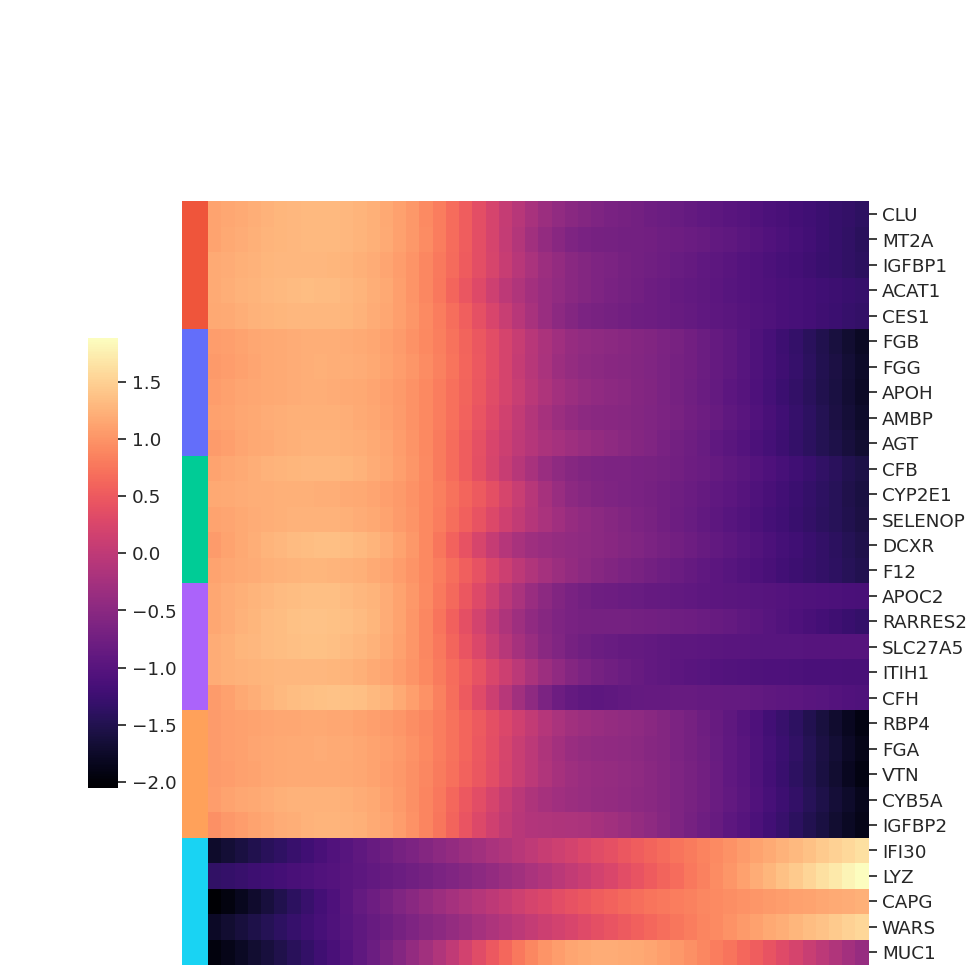

In [21]:
with open("./deg_PSAP.pkl", 'rb') as file:
    deg_result = pickle.load(file)
df_deg_clus, df_yhat_clus = ct.tl.communication_deg_clustering(df_deg, df_yhat, deg_clustering_res=0.4)
top_de_genes_PSAP = ct.pl.plot_communication_dependent_genes(df_deg_clus, df_yhat_clus, top_ngene_per_cluster=5,
    filename='./heatmap_deg_MIF-CD74_CD44.pdf', font_scale=1.2, return_genes=True)

Text(0.5, 1.0, 'An example positive DE gene (IFI30)')

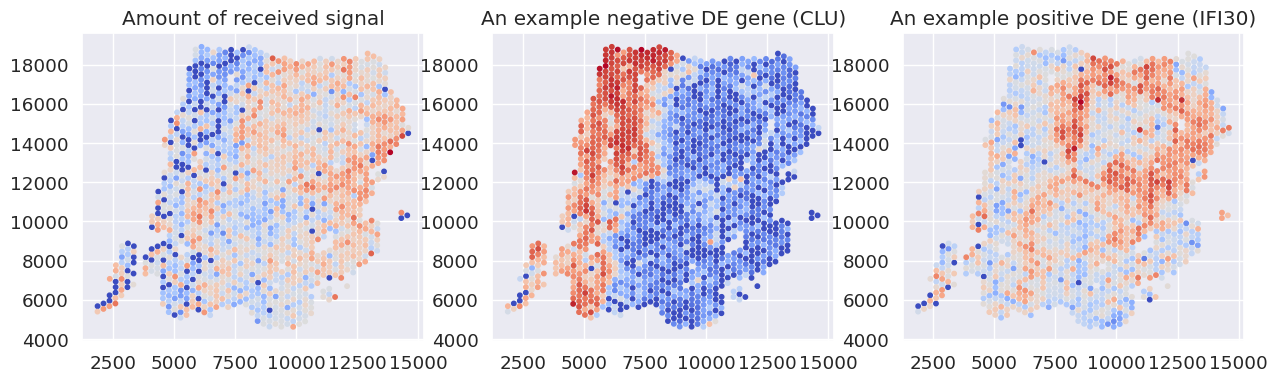

In [22]:
X_sc = adata_dis500.obsm['spatial']
fig, ax = plt.subplots(1,3, figsize=(15,4))
colors = adata_dis500.obsm['commot-cellchat-sum-receiver']['r-MIF-CD74_CD44'].values
idx = np.argsort(colors)
ax[0].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
colors = adata_dis500[:,'CLU'].X.toarray().flatten()
idx = np.argsort(colors)
ax[1].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
colors = adata_dis500[:,'IFI30'].X.toarray().flatten()
idx = np.argsort(colors)
ax[2].scatter(X_sc[idx,0],X_sc[idx,1], c=colors[idx], cmap='coolwarm', s=10)
ax[0].set_title('Amount of received signal')
ax[1].set_title('An example negative DE gene (CLU)')
ax[2].set_title('An example positive DE gene (IFI30)')

<Axes: >

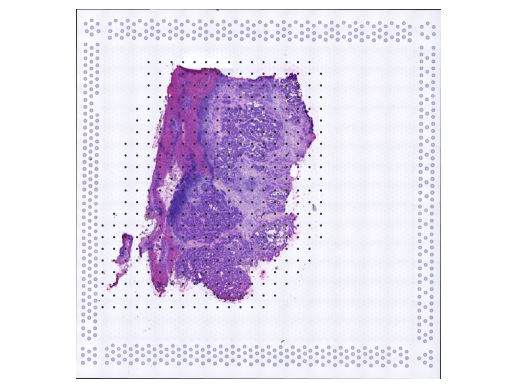

In [32]:
#SENDER INFO
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='MIF-CD74_CD44', k=5)
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='MIF-CD74_CD44', plot_method='grid', background_legend=True,
    scale=0.00003, ndsize=8, grid_density=0.4, summary='sender', background='image', clustering='leiden', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.995)